# 🌱 **CASO DI STUDIO: <font color=BLUE>AI.rrigation</font>, un sistema per la predizione della quantità di acqua necessaria alle colture**

> *Michelangelo Massaro - Matr.779603*
>
> *Informatica, Università degli Studi di Bari 'Aldo Moro'*
>
> Esame di *Ingegneria della Conoscenza* - AA 2025-2026


NB: Ogni sezione può essere eseguita senza dover eseguire le precedenti

In [1]:
# Import librerie utili
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ↪ Caricamento del dataset da repository [GitHub](https://github.com/massaro-m/AI.rrigation)

In [2]:
dataset = "https://github.com/massaro-m/ICON/raw/refs/heads/main/dataset/irrigation_prediction.csv"
df = pd.read_csv(dataset)
df

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


## ↪ Analisi e pre-processing dei dati disponibili

> NB: *Queste celle possono non essere eseguite. Il dataset con le modifiche apportate è stato caricato nel repository.*



Verifico la presenza di valori nulli e di esempi/righe duplicate

In [3]:
def VerificaNulli(dataset):
    colonne_con_nulli = []
    for col in df.columns:
        if df[col].isnull().any():
            colonne_con_nulli.append(col)

    if not colonne_con_nulli:
        print("Nessuna colonna con valori nulli")
    else:
        print(colonne_con_nulli)  # Elenco colonne con nulli

VerificaNulli(df)

Nessuna colonna con valori nulli


In [4]:
duplicati = df.duplicated()
print("Numero di righe duplicate:", duplicati.sum())

Numero di righe duplicate: 0


Verifico il tipo di valori delle colonne

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print("Categorical Columns:\n", categorical_cols)
print("Numerical Columns:\n", numerical_cols)

print("\nDomini delle feature categoriche:")
for colonna in categorical_cols:
    valori_unici = df[colonna].unique()
    print(f"--> {colonna}: {valori_unici}")

Categorical Columns:
 Index(['Soil_Type', 'Crop_Type', 'Crop_Growth_Stage', 'Season',
       'Irrigation_Type', 'Water_Source', 'Mulching_Used', 'Region',
       'Irrigation_Need'],
      dtype='object')
Numerical Columns:
 Index(['Soil_pH', 'Soil_Moisture', 'Organic_Carbon', 'Electrical_Conductivity',
       'Temperature_C', 'Humidity', 'Rainfall_mm', 'Sunlight_Hours',
       'Wind_Speed_kmh', 'Field_Area_hectare', 'Previous_Irrigation_mm'],
      dtype='object')

Domini delle feature categoriche:
--> Soil_Type: ['Clay' 'Silt' 'Sandy' 'Loamy']
--> Crop_Type: ['Wheat' 'Maize' 'Cotton' 'Rice' 'Sugarcane' 'Potato']
--> Crop_Growth_Stage: ['Vegetative' 'Flowering' 'Harvest' 'Sowing']
--> Season: ['Rabi' 'Zaid' 'Kharif']
--> Irrigation_Type: ['Rainfed' 'Canal' 'Drip' 'Sprinkler']
--> Water_Source: ['Reservoir' 'Groundwater' 'River' 'Rainwater']
--> Mulching_Used: ['Yes' 'No']
--> Region: ['South' 'Central' 'North' 'East' 'West']
--> Irrigation_Need: ['Low' 'Medium' 'High']


Verifico la distribuzione dei valori delle feature numeriche

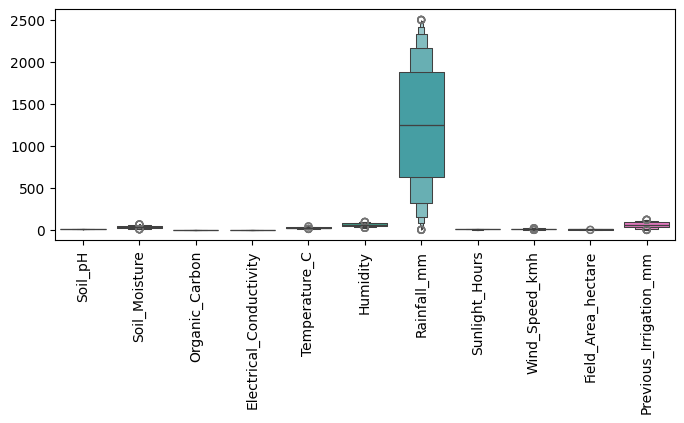

In [7]:
plt.figure(figsize=(8,3))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

Codifica delle variabili categoriche:


1.   Variabile target da categorica a numerica ordinale
2.   Variabile `Rainfall_mm` da categorica binaria (Yes/No) a booleana (1/0)
3.   Label Encoding delle restanti

In [8]:
from sklearn.preprocessing import LabelEncoder
df_new = df
mapping_target = {'Low': 0, 'Medium': 1, 'High': 2}
df_new['Irrigation_Need'] = df_new['Irrigation_Need'].map(mapping_target)
mapping_mulching_used = {'Yes': 1, 'No': 0}
df_new['Mulching_Used'] = df_new['Mulching_Used'].map(mapping_mulching_used)

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df_new

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,5,3,1,2,2,4.73,1,1.98,3,0
1,3,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,1,0,2,0,0,12.22,1,33.56,0,1
2,2,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,0,1,1,1,2,5.52,1,34.62,3,0
3,0,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,5,2,0,0,2,1.43,1,84.03,2,1
4,0,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,0,2,2,0,3,2.52,0,60.86,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,4,2,0,1,0,2.62,1,92.44,3,0
9996,0,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,1,2,0,2,0,4.87,0,15.46,3,0
9997,1,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,2,1,0,0,0,10.08,1,116.36,2,0
9998,1,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,4,1,0,2,2,11.11,1,118.17,1,0


Irrigation_Need
0    5864
1    3800
2     336
Name: count, dtype: int64
 


Text(0.5, 1.0, 'Distribuzione delle classi')

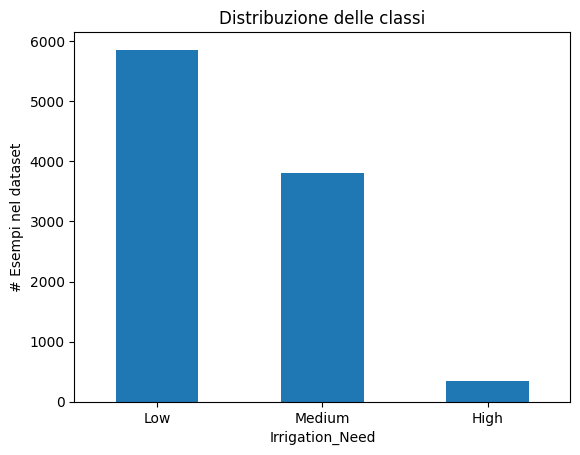

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Verifico il numero di esempi per classe
conteggio = df_new["Irrigation_Need"].value_counts()
print(conteggio)
print(" ")

# Plot dell'istogramma
fig, ax = plt.subplots(1,1)
df_new['Irrigation_Need'].value_counts().reindex([0, 1, 2], fill_value=0).plot(kind='bar', ax=ax)

ax.set_xticklabels(['Low', 'Medium', 'High'], rotation=0)
ax.set_ylabel('# Esempi nel dataset')
ax.set_title('Distribuzione delle classi')

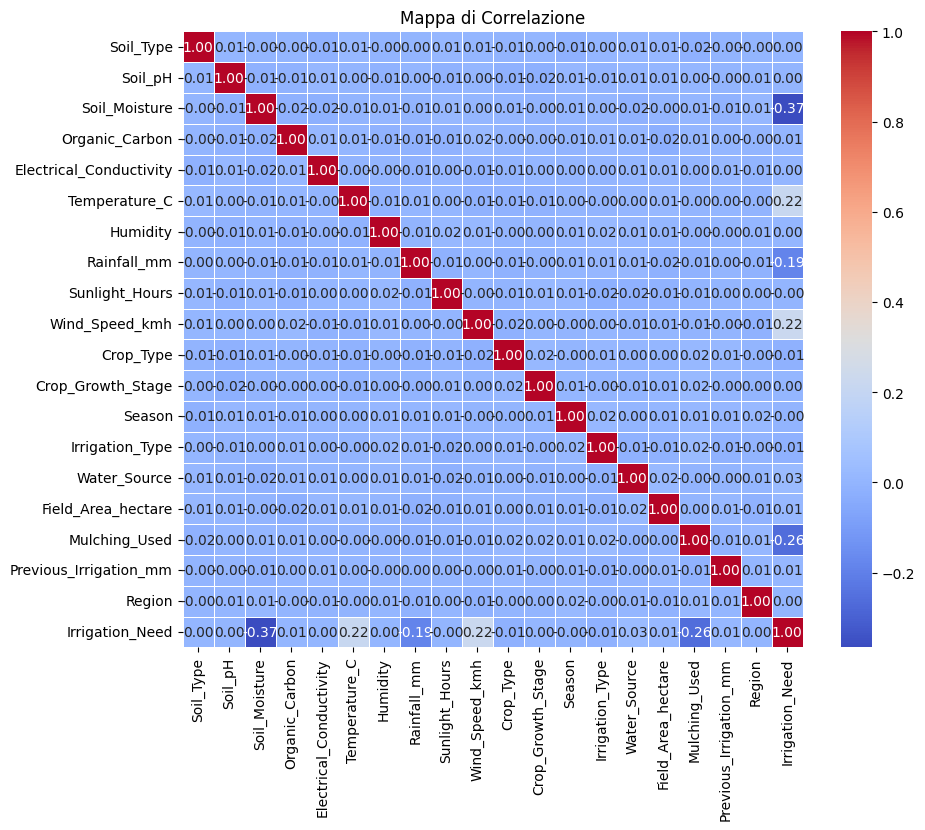

In [10]:
# Calcolo la matrice di correlazione
correlation_matrix = df_new.corr(numeric_only=True)

# Creo la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # mostro i valori numerici
    cmap="coolwarm",     # colori
    fmt=".2f",           # formato numeri
    linewidths=0.5
)

plt.title("Mappa di Correlazione")
plt.show()

In [11]:
# Seleziona solo colonne numeriche
df_numeric = df.select_dtypes(include="number")

# Calcola correlazione rispetto al target
corr_target = df_numeric.corr()['Irrigation_Need'].sort_values(ascending=False)

print(corr_target)

Irrigation_Need            1.000000
Wind_Speed_kmh             0.224459
Temperature_C              0.215594
Water_Source               0.027164
Field_Area_hectare         0.014514
Previous_Irrigation_mm     0.012903
Organic_Carbon             0.007434
Soil_Type                  0.003791
Humidity                   0.003519
Electrical_Conductivity    0.003019
Crop_Growth_Stage          0.002959
Region                     0.001996
Soil_pH                    0.001768
Sunlight_Hours            -0.002168
Season                    -0.003979
Crop_Type                 -0.013833
Irrigation_Type           -0.014974
Rainfall_mm               -0.185184
Mulching_Used             -0.260445
Soil_Moisture             -0.365639
Name: Irrigation_Need, dtype: float64


Salvo il nuovo dataset con tutte le modifiche apportate

In [ ]:
df_new.to_csv("optimized_dataset.csv", index=False)


## ↪ Apprendimento supervisionato

Importo il dataset processato, ottenuto nella sezione precedente, da repository [Github](https://github.com/massaro-m/AI.rrigation)

In [12]:
processed_dataset = "https://raw.githubusercontent.com/massaro-m/AI.rrigation/refs/heads/main/dataset/irrigation_prediction.csv"
df = pd.read_csv(processed_dataset)
df

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


Implemento la funzione che si occupa di training e testing.

Ogni modello viene valutato su più split del dataset in training/test set attraverso la CV esterna. Quella interna riguarda l'ottimizzazione degli iperparametri e viene ripetura per ogni split.

La metrica scelta per la valutazione è l'**F1-score** ovvero la media armonica di precisione e richiamo. Si calcola come $F1=\frac{P+R}{2PR}$. Si considera la media e la deviazione standard. Non si considera l'accuratezza perchè il dataset è sbilanciato.

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold

def train_and_evaluate(X,y,estimator,param_grid,scoring="f1_weighted",n_splits=5,n_repeats=5,random_state=42):
    """
    Valuta un modello con CV interna + esterna

    Restituisce media e deviazione standard delle metriche sul test set.
    """

    f1_weighted_scorer = make_scorer(f1_score, average='weighted', zero_division=0)

    cv_esterna = RepeatedStratifiedKFold(
        n_splits=n_splits,
        n_repeats=n_repeats,
        random_state=random_state
    )

    f1_scores = []
    p_scores = []
    r_scores = []

    for i_train, i_test in cv_esterna.split(X, y):
        print('ok') # per debug
        X_train, X_test = X.iloc[i_train], X.iloc[i_test]
        y_train, y_test = y.iloc[i_train], y.iloc[i_test]

        # CV interna --> ottimizzazione iperparametri
        cv_interna = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        grid = GridSearchCV(
            estimator=estimator,
            param_grid=param_grid,
            scoring=f1_weighted_scorer,
            cv=cv_interna,
            n_jobs=-1
        )

        grid.fit(X_train, y_train)

        best_params_per_run = []
        best_params_per_run.append(grid.best_params_)
        print(best_params_per_run)

        best_model = grid.best_estimator_

        # Valutazione sul test-set esterno
        y_pred = best_model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        p = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        r = recall_score(y_test, y_pred, average="weighted", zero_division=0)

        f1_scores.append(f1)
        p_scores.append(p)
        r_scores.append(r)

    return {
        "f1_mean": np.mean(f1_scores),
        "f1_std": np.std(f1_scores),
        "f1_all_scores": f1_scores,
        "p_mean": np.mean(p_scores),
        "p_std": np.std(p_scores),
        "p_all_scores": p_scores,
        "r_mean": np.mean(r_scores),
        "r_std": np.std(r_scores),
        "r_all_scores": r_scores
    }

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

target_col = "Irrigation_Need"

features = df_new.drop(columns=[target_col]) # matrice delle feature
target = df_new[target_col] # vettore dei target

dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    "max_depth": [10, 15],
    "min_samples_split": [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
rf_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
}

ab = AdaBoostClassifier(random_state=42)
ab_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0]
}

results = {}

print('\n** DT **')
results["Decision Tree"] = train_and_evaluate(features, target, dt, dt_params)
print('\n** RF **')
results["Random Forest"] = train_and_evaluate(features, target, rf, rf_params)
print('\n** AB **')
results["AdaBoost"] = train_and_evaluate(features, target, ab, ab_params)

for model, res in results.items():
      print(f"{model}")
      print(f"  F1 mean: {res['f1_mean']:.4f} - F1 std : {res['f1_std']:.4f}")
      print(f"  P mean: {res['p_mean']:.4f} - P std : {res['p_std']:.4f}")
      print(f"  R mean: {res['r_mean']:.4f} - R std : {res['r_std']:.4f}")


** DT **
ok
[{'max_depth': 10, 'min_samples_split': 2}]
ok
[{'max_depth': 10, 'min_samples_split': 2}]
ok
[{'max_depth': 10, 'min_samples_split': 2}]
ok
[{'max_depth': 10, 'min_samples_split': 10}]
ok
[{'max_depth': 10, 'min_samples_split': 2}]
ok
[{'max_depth': 10, 'min_samples_split': 5}]
ok
[{'max_depth': 10, 'min_samples_split': 5}]
ok
[{'max_depth': 10, 'min_samples_split': 5}]
ok
[{'max_depth': 10, 'min_samples_split': 5}]
ok
[{'max_depth': 10, 'min_samples_split': 2}]
ok
[{'max_depth': 10, 'min_samples_split': 5}]
ok
[{'max_depth': 10, 'min_samples_split': 10}]
ok
[{'max_depth': 10, 'min_samples_split': 2}]
ok
[{'max_depth': 15, 'min_samples_split': 2}]
ok
[{'max_depth': 10, 'min_samples_split': 5}]
ok
[{'max_depth': 10, 'min_samples_split': 10}]
ok
[{'max_depth': 10, 'min_samples_split': 10}]
ok
[{'max_depth': 10, 'min_samples_split': 10}]
ok
[{'max_depth': 10, 'min_samples_split': 5}]
ok
[{'max_depth': 10, 'min_samples_split': 2}]
ok
[{'max_depth': 10, 'min_samples_split': 2}

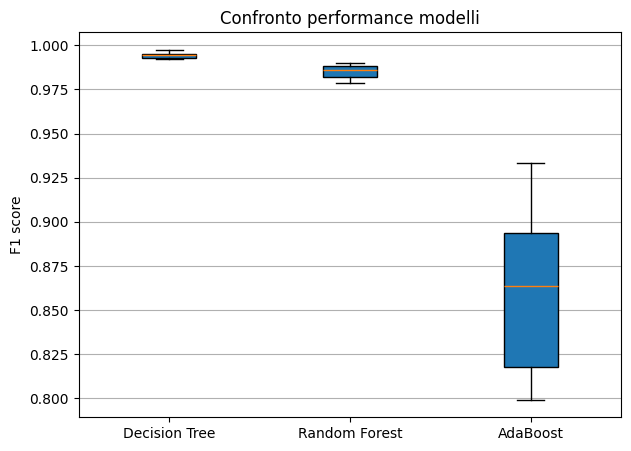

In [ ]:
# Verifico la distribuzione delle misure ottenute

import matplotlib.pyplot as plt

model_names = list(results.keys())
all_scores = [results[m]["f1_all_scores"] for m in model_names]

plt.figure(figsize=(7,5))
plt.boxplot(all_scores, tick_labels=model_names, patch_artist=True)
plt.ylabel("F1 score")
plt.title("Confronto performance modelli")
plt.grid(axis='y')
plt.show()

## ↪ Apprendimento Probabilistico + Rappresentazione della Conoscenza

### BN

Importo il dataset ottimizzato

In [14]:
import pandas as pd

dataset = "https://raw.githubusercontent.com/massaro-m/AI.rrigation/refs/heads/main/dataset/optimized_dataset.csv"
opt_df = pd.read_csv(dataset)
opt_df

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,5,3,1,2,2,4.73,1,1.98,3,0
1,3,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,1,0,2,0,0,12.22,1,33.56,0,1
2,2,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,0,1,1,1,2,5.52,1,34.62,3,0
3,0,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,5,2,0,0,2,1.43,1,84.03,2,1
4,0,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,0,2,2,0,3,2.52,0,60.86,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,4,2,0,1,0,2.62,1,92.44,3,0
9996,0,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,1,2,0,2,0,4.87,0,15.46,3,0
9997,1,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,2,1,0,0,0,10.08,1,116.36,2,0
9998,1,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,4,1,0,2,2,11.11,1,118.17,1,0


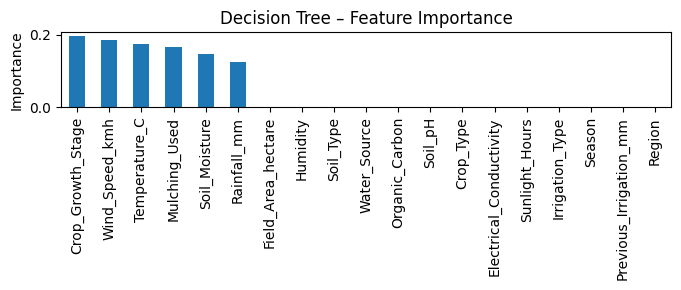

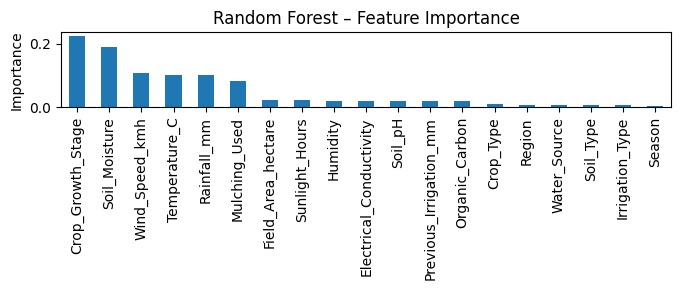

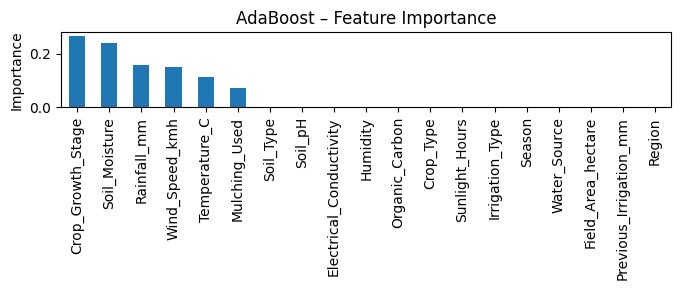

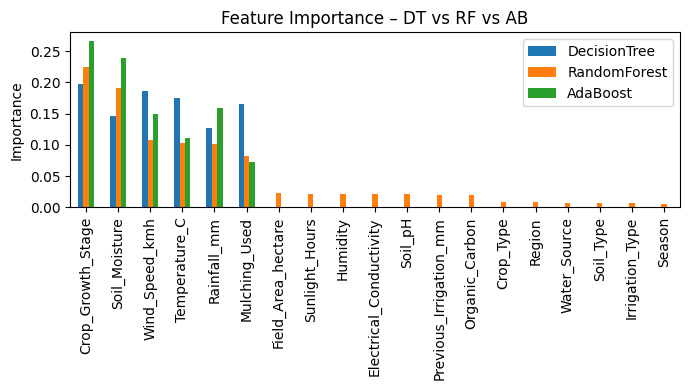

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

features = opt_df.drop("Irrigation_Need",axis=1)
target = opt_df["Irrigation_Need"]

# Split in train and test set
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=10) # 80% Train - 20% Test

# Addestro i modelli con gli iperparametri migliori trovati
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

ab = AdaBoostClassifier(n_estimators=50, learning_rate=1 , random_state=42)
ab.fit(X_train, y_train)

# Verifico l'importanza delle feature per ognuno
fi_dt = pd.Series(dt.feature_importances_, index=features.columns)
fi_dt = fi_dt.sort_values(ascending=False)

fi_rf = pd.Series(rf.feature_importances_, index=features.columns)
fi_rf = fi_rf.sort_values(ascending=False)

fi_ab = pd.Series(ab.feature_importances_, index=features.columns)
fi_ab = fi_ab.sort_values(ascending=False)

# Plot
plt.figure(figsize=(7,3))
fi_dt.plot(kind="bar")
plt.ylabel("Importance")
plt.title("Decision Tree – Feature Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,3))
fi_rf.plot(kind="bar")
plt.ylabel("Importance")
plt.title("Random Forest – Feature Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,3))
fi_ab.plot(kind="bar")
plt.ylabel("Importance")
plt.title("AdaBoost – Feature Importance")
plt.tight_layout()
plt.show()

# Plot per i 3 algoritmi
new_df = pd.DataFrame({
    "DecisionTree": dt.feature_importances_,
    "RandomForest": rf.feature_importances_,
    "AdaBoost": ab.feature_importances_
}, index=features.columns)

new_df = new_df.sort_values(by="RandomForest", ascending=False)

new_df.plot(kind="bar", figsize=(7,4))
plt.ylabel("Importance")
plt.title("Feature Importance – DT vs RF vs AB")
plt.tight_layout()
plt.show()

Importo il dataset originale

In [16]:
import pandas as pd
dataset = "https://raw.githubusercontent.com/massaro-m/AI.rrigation/refs/heads/main/dataset/irrigation_prediction.csv"
df = pd.read_csv(dataset)
df

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


In [ ]:
df['Rainfall_mm'].min(), df['Rainfall_mm'].max()
df['Temperature_C'].min(), df['Temperature_C'].max()
df['Wind_Speed_kmh'].min(), df['Wind_Speed_kmh'].max()

(0.5, 20.0)

Procedo con la discretizzazione del dataset

In [17]:
bins = [0, 6, 8, 14]
labels = ['acido', 'neutro', 'basico']
df['Soil_pH'] = pd.cut(df['Soil_pH'], bins=bins, labels=labels)

bins = [0, 12, 27, 42]
labels = ['freddo', 'caldo_freddo', 'caldo']
df['Temperature_C'] = pd.cut(df['Temperature_C'],bins=bins,labels=labels)

bins = [0, 5, 10, 20]
labels = ['calma', 'leggera', 'moderata']
df['Wind_Speed_kmh'] = pd.cut(df['Wind_Speed_kmh'],bins=bins,labels=labels)

bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '51-75%', '76-100%']
df['Humidity'] = pd.cut(df['Humidity'],bins=bins,labels=labels)

labels = ['piccolo', 'medio', 'grande']
df['Field_Area_hectare'] = pd.cut(df['Field_Area_hectare'],bins=3,labels=labels)

labels = ['bassa', 'media', 'alta']
df['Electrical_Conductivity'] = pd.cut(df['Electrical_Conductivity'],bins=3,labels=labels)

labels = ['poco', 'medio', 'tanto']
df['Organic_Carbon'] = pd.cut(df['Organic_Carbon'],bins=3,labels=labels)

df['Sunlight_Hours'] = pd.cut(df['Sunlight_Hours'],bins=3)
df['Rainfall_mm'] = pd.cut(df['Rainfall_mm'],bins=3)
df['Previous_Irrigation_mm'] = pd.cut(df['Previous_Irrigation_mm'], bins=5)
df['Soil_Moisture'] = pd.cut(df['Soil_Moisture'], bins=5)
df

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,neutro,"(30.8, 42.2]",poco,media,caldo_freddo,25-50%,"(833.483, 1666.587]","(3.993, 6.333]",calma,Wheat,Vegetative,Rabi,Rainfed,Reservoir,piccolo,Yes,"(-0.1, 24.014]",South,Low
1,Silt,neutro,"(42.2, 53.6]",poco,bassa,caldo,25-50%,"(-2.119, 833.483]","(8.667, 11.0]",moderata,Maize,Flowering,Zaid,Canal,Groundwater,grande,Yes,"(24.014, 48.008]",Central,Medium
2,Sandy,neutro,"(30.8, 42.2]",medio,media,caldo,76-100%,"(1666.587, 2499.69]","(6.333, 8.667]",moderata,Cotton,Harvest,Rabi,Drip,Reservoir,medio,Yes,"(24.014, 48.008]",South,Low
3,Clay,acido,"(7.943, 19.4]",tanto,bassa,caldo,25-50%,"(-2.119, 833.483]","(8.667, 11.0]",moderata,Wheat,Sowing,Kharif,Canal,Reservoir,piccolo,Yes,"(72.002, 95.996]",North,Medium
4,Clay,neutro,"(7.943, 19.4]",medio,alta,caldo_freddo,76-100%,"(1666.587, 2499.69]","(8.667, 11.0]",moderata,Cotton,Sowing,Zaid,Canal,River,piccolo,No,"(48.008, 72.002]",South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,neutro,"(19.4, 30.8]",medio,bassa,caldo,51-75%,"(833.483, 1666.587]","(6.333, 8.667]",moderata,Sugarcane,Sowing,Kharif,Drip,Groundwater,piccolo,Yes,"(72.002, 95.996]",South,Low
9996,Clay,acido,"(42.2, 53.6]",medio,bassa,caldo,51-75%,"(833.483, 1666.587]","(8.667, 11.0]",leggera,Maize,Sowing,Kharif,Rainfed,Groundwater,piccolo,No,"(-0.1, 24.014]",South,Low
9997,Loamy,acido,"(53.6, 65.0]",medio,media,caldo,51-75%,"(1666.587, 2499.69]","(8.667, 11.0]",moderata,Potato,Harvest,Kharif,Canal,Groundwater,medio,Yes,"(95.996, 119.99]",North,Low
9998,Loamy,neutro,"(42.2, 53.6]",tanto,bassa,caldo,51-75%,"(1666.587, 2499.69]","(3.993, 6.333]",calma,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,grande,Yes,"(95.996, 119.99]",East,Low


In [18]:
%pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 34.5 MB/s eta 0:00:00


In [19]:
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator
from pgmpy.models import DiscreteBayesianNetwork
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import networkx as nx

# Apprendimento della struttura
def learn_bn(dati, metrica):
  hc = HillClimbSearch(dati)
  model = hc.estimate(scoring_method=metrica)

  return model.edges()

# Apprendimento dei parametri: Calcolo delle CPD
def train_bn(dati, archi):
  model = DiscreteBayesianNetwork(archi)

  train, test = train_test_split(dati, test_size=0.2)

  model.fit(train, estimator=MaximumLikelihoodEstimator)
  print("Modello addestrato")

  return model, train, test


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC
Archi appresi:
[('Soil_Moisture', 'Irrigation_Need'), ('Wind_Speed_kmh', 'Temperature_C'), ('Crop_Growth_Stage', 'Irrigation_Need'), ('Crop_Growth_Stage', 'Wind_Speed_kmh'), ('Mulching_Used', 'Irrigation_Need'), ('Mulching_Used', 'Wind_Speed_kmh'), ('Mulching_Used', 'Rainfall_mm'), ('Mulching_Used', 'Temperature_C'), ('Irrigation_Need', 'Wind_Speed_kmh'), ('Irrigation_Need', 'Temperature_C'), ('Irrigation_Need', 'Rainfall_mm')]

BDeu
Archi appresi:
[('Soil_Moisture', 'Irrigation_Need'), ('Temperature_C', 'Irrigation_Need'), ('Wind_Speed_kmh', 'Irrigation_Need'), ('Crop_Growth_Stage', 'Irrigation_Need'), ('Mulching_Used', 'Irrigation_Need'), ('Mulching_Used', 'Rainfall_mm'), ('Irrigation_Need', 'Rainfall_mm')]
Modello addestrato

Nodi BIC: ['Soil_Moisture', 'Irrigation_Need', 'Wind_Speed_kmh', 'Temperature_C', 'Crop_Growth_Stage', 'Mulching_Used', 'Rainfall_mm']
Modello addestrato

Nodi BDeu: ['Soil_Moisture', 'Irrigation_Need', 'Temperature_C', 'Wind_Speed_kmh', 'Crop_Growth_Stage'

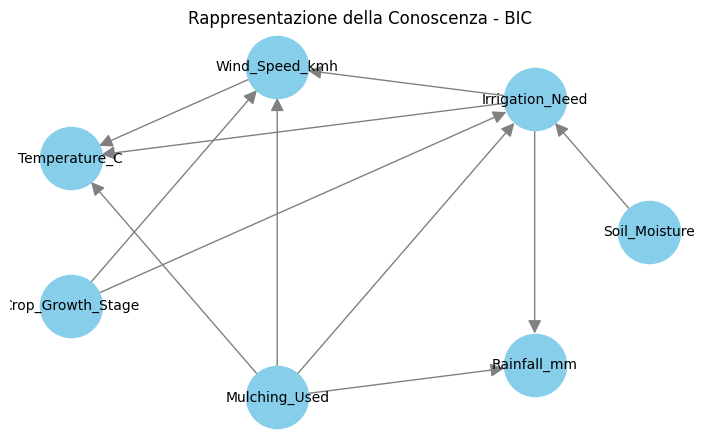

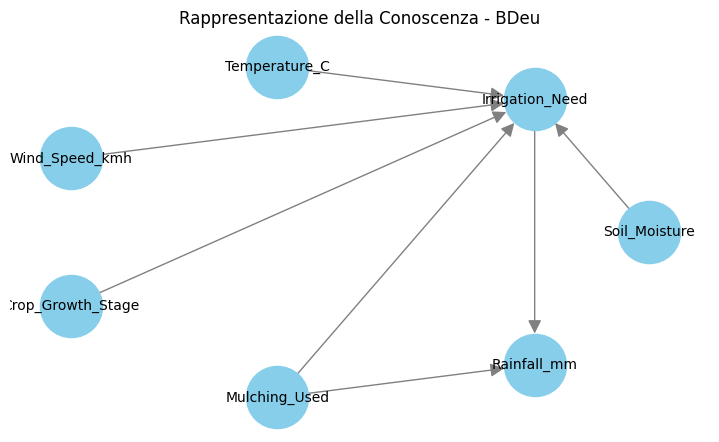

In [20]:
from pgmpy.estimators import BIC, BDeu

bic_score = BIC(df)
bdeu_score = BDeu(df)

# Archi con BIC e BDeu
edges_bic = learn_bn(df, bic_score)
edges_bdeu = learn_bn(df, bdeu_score)

print('BIC')
print("Archi appresi:")
print(edges_bic)

print('\nBDeu')
print("Archi appresi:")
print(edges_bdeu)

model_bic, train_bic, test_bic = train_bn(df, edges_bic)
print(f"\nNodi BIC: {model_bic.nodes()}")
model_bdeu, train_bdeu, test_bdeu = train_bn(df, edges_bdeu)
print(f"\nNodi BDeu: {model_bdeu.nodes()}")

# Visualizzazione dei Grafi
plt.figure(figsize=(7, 4))
pos = nx.circular_layout(model_bic)
nx.draw(model_bic, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10, arrowsize=20)
plt.title("Rappresentazione della Conoscenza - BIC")
plt.show()

plt.figure(figsize=(7, 4))
pos = nx.circular_layout(model_bdeu)
nx.draw(model_bdeu, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10, arrowsize=20)
plt.title("Rappresentazione della Conoscenza - BDeu")
plt.show()


Ottengo il Markov Blanket per la varibile target

In [21]:
markov_blanket = model_bdeu.get_markov_blanket('Irrigation_Need')
print(f"Variabili fondamentali per l'inferenza: {markov_blanket}")

Variabili fondamentali per l'inferenza: ['Mulching_Used', 'Rainfall_mm', 'Temperature_C', 'Wind_Speed_kmh', 'Soil_Moisture', 'Crop_Growth_Stage']


Fase della predizione

In [22]:
from pgmpy.inference import VariableElimination
from sklearn.metrics import precision_score, recall_score, f1_score

# Algoritmo di inferenza
infer = VariableElimination(model_bdeu)

mb_features = markov_blanket

y_true = test_bdeu['Irrigation_Need'].values
y_pred = []

for index, row in test_bdeu.iterrows():
    # Creo l'evidenza usando solo le feature presenti nel Markov Blanket
    evidence = {k: v for k, v in row.items() if k in mb_features}

    # Eseguo la query MAP (Maximum A Posteriori)
    result = infer.map_query(variables=['Irrigation_Need'], evidence=evidence, show_progress=False)
    y_pred.append(result['Irrigation_Need'])

print("Classificazione completata.")

Classificazione completata.


Calcolo delle metriche

In [ ]:
print("Precisione")
print(precision_score(y_true, y_pred, average="weighted", zero_division=0))
print("Richiamo")
print(recall_score(y_true, y_pred, average="weighted", zero_division=0))
print("Misura F1")
print(f1_score(y_true, y_pred, average="weighted", zero_division=0))

Precisione
0.8649298815699324
Richiamo
0.8665
Misura F1
0.862907414674353


Calcolo media e deviazione standard delle misure ottenute in 5 diversi run.

In [ ]:
import numpy as np

f1 = [0.867, 0.869, 0.88, 0.884, 0.872]
print(np.mean(f1))
print(np.std(f1))
p = [0.869, 0.872, 0.882, 0.888, 0.874]
print(np.mean(p))
print(np.std(p))
r = [0.866, 0.873, 0.884, 0.888, 0.876]
print(np.mean(r))
print(np.std(r))

0.8744
0.0065299310869258095
0.877
0.006985699678629198
0.8774
0.007838367176906176


### Naive Bayes

Importo il dataset

In [23]:
import pandas as pd
dataset = "https://raw.githubusercontent.com/massaro-m/AI.rrigation/refs/heads/main/dataset/irrigation_prediction.csv"
df_nb = pd.read_csv(dataset)
df_nb

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


Discretizzo le feature numeriche

In [24]:
bins = [0, 6, 8, 14]
labels = ['acido', 'neutro', 'basico']
df_nb['Soil_pH'] = pd.cut(df_nb['Soil_pH'], bins=bins, labels=labels)

bins = [0, 12, 27, 42]
labels = ['freddo', 'caldo_freddo', 'caldo']
df_nb['Temperature_C'] = pd.cut(df_nb['Temperature_C'],bins=bins,labels=labels)

bins = [0, 5, 10, 20]
labels = ['calma', 'leggera', 'moderata']
df_nb['Wind_Speed_kmh'] = pd.cut(df_nb['Wind_Speed_kmh'],bins=bins,labels=labels)

bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '51-75%', '76-100%']
df_nb['Humidity'] = pd.cut(df_nb['Humidity'],bins=bins,labels=labels)

labels = ['piccolo', 'medio', 'grande']
df_nb['Field_Area_hectare'] = pd.cut(df_nb['Field_Area_hectare'],bins=3,labels=labels)

labels = ['bassa', 'media', 'alta']
df_nb['Electrical_Conductivity'] = pd.cut(df_nb['Electrical_Conductivity'],bins=3,labels=labels)

labels = ['poco', 'medio', 'tanto']
df_nb['Organic_Carbon'] = pd.cut(df_nb['Organic_Carbon'],bins=3,labels=labels)

df_nb['Sunlight_Hours'] = pd.cut(df_nb['Sunlight_Hours'],bins=3)
df_nb['Rainfall_mm'] = pd.cut(df_nb['Rainfall_mm'],bins=3)
df_nb['Previous_Irrigation_mm'] = pd.cut(df_nb['Previous_Irrigation_mm'], bins=5)
df_nb['Soil_Moisture'] = pd.cut(df_nb['Soil_Moisture'], bins=5)
df_nb

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,neutro,"(30.8, 42.2]",poco,media,caldo_freddo,25-50%,"(833.483, 1666.587]","(3.993, 6.333]",calma,Wheat,Vegetative,Rabi,Rainfed,Reservoir,piccolo,Yes,"(-0.1, 24.014]",South,Low
1,Silt,neutro,"(42.2, 53.6]",poco,bassa,caldo,25-50%,"(-2.119, 833.483]","(8.667, 11.0]",moderata,Maize,Flowering,Zaid,Canal,Groundwater,grande,Yes,"(24.014, 48.008]",Central,Medium
2,Sandy,neutro,"(30.8, 42.2]",medio,media,caldo,76-100%,"(1666.587, 2499.69]","(6.333, 8.667]",moderata,Cotton,Harvest,Rabi,Drip,Reservoir,medio,Yes,"(24.014, 48.008]",South,Low
3,Clay,acido,"(7.943, 19.4]",tanto,bassa,caldo,25-50%,"(-2.119, 833.483]","(8.667, 11.0]",moderata,Wheat,Sowing,Kharif,Canal,Reservoir,piccolo,Yes,"(72.002, 95.996]",North,Medium
4,Clay,neutro,"(7.943, 19.4]",medio,alta,caldo_freddo,76-100%,"(1666.587, 2499.69]","(8.667, 11.0]",moderata,Cotton,Sowing,Zaid,Canal,River,piccolo,No,"(48.008, 72.002]",South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,neutro,"(19.4, 30.8]",medio,bassa,caldo,51-75%,"(833.483, 1666.587]","(6.333, 8.667]",moderata,Sugarcane,Sowing,Kharif,Drip,Groundwater,piccolo,Yes,"(72.002, 95.996]",South,Low
9996,Clay,acido,"(42.2, 53.6]",medio,bassa,caldo,51-75%,"(833.483, 1666.587]","(8.667, 11.0]",leggera,Maize,Sowing,Kharif,Rainfed,Groundwater,piccolo,No,"(-0.1, 24.014]",South,Low
9997,Loamy,acido,"(53.6, 65.0]",medio,media,caldo,51-75%,"(1666.587, 2499.69]","(8.667, 11.0]",moderata,Potato,Harvest,Kharif,Canal,Groundwater,medio,Yes,"(95.996, 119.99]",North,Low
9998,Loamy,neutro,"(42.2, 53.6]",tanto,bassa,caldo,51-75%,"(1666.587, 2499.69]","(3.993, 6.333]",calma,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,grande,Yes,"(95.996, 119.99]",East,Low


Rendo la variabile target ordinale tramite mapping manuale

In [25]:
mapping_target = {'Low': 0, 'Medium': 1, 'High': 2}
df_nb['Irrigation_Need'] = df_nb['Irrigation_Need'].map(mapping_target)

Encoding delle feature discretizzate

In [26]:
from sklearn.preprocessing import LabelEncoder

# Identifico le colonne con variabili discrete
categorical_cols_nb = df_nb.select_dtypes(include=['object', 'category']).columns

# Applico il LabelEncoder
label_encoders_nb = {}
for col in categorical_cols_nb:
    le = LabelEncoder()
    df_nb[col] = le.fit_transform(df_nb[col].astype(str))
    label_encoders_nb[col] = le

df_nb

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,2,1,1,2,1,1,2,0,0,5,3,1,2,2,2,1,0,3,0
1,3,2,2,1,1,0,1,0,2,2,1,0,2,0,0,0,1,1,0,1
2,2,2,1,0,2,0,3,1,1,2,0,1,1,1,2,1,1,1,3,0
3,0,0,4,2,1,0,1,0,2,2,5,2,0,0,2,2,1,3,2,1
4,0,2,4,0,0,1,3,1,2,2,0,2,2,0,3,2,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,2,0,0,1,0,2,2,1,2,4,2,0,1,0,2,1,3,3,0
9996,0,0,2,0,1,0,2,2,2,1,1,2,0,2,0,2,0,0,3,0
9997,1,0,3,0,2,0,2,1,2,2,2,1,0,0,0,1,1,4,2,0
9998,1,2,2,2,1,0,2,1,0,0,4,1,0,2,2,0,1,4,1,0


Addestro e valuto il modello

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import recall_score, f1_score, precision_score

nb = CategoricalNB(alpha=1.0)

features = df_nb.drop("Irrigation_Need",axis=1)
target = df_nb["Irrigation_Need"]

# Split in train e test set
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

# Addestramento del modello
nb.fit(X_train, y_train)

# Predizione sul test set
y_pred = nb.predict(X_test)

print("Precisione")
print(precision_score(y_test, y_pred, average="weighted", zero_division=0))
print("Richiamo")
print(recall_score(y_test, y_pred, average="weighted", zero_division=0))
print("Misura F1")
print(f1_score(y_test, y_pred, average="weighted", zero_division=0))

Precisione
0.8289996307180952
Richiamo
0.8405
Misura F1
0.8252107273154042


Calcolo media e deviazione standard delle misure ottenute in 5 diversi run

In [ ]:
import numpy as np

f1 = [0.83, 0.84, 0.84, 0.84, 0.83]
print(np.mean(f1))
print(np.std(f1))
p = [0.84, 0.85, 0.86, 0.85, 0.84]
print(np.mean(p))
print(np.std(p))
r = [0.83, 0.85, 0.86, 0.85, 0.83]
print(np.mean(r))
print(np.std(r))

0.836
0.00489897948556636
0.8480000000000001
0.007483314773547889
0.844
0.01200000000000001


Rappresentazione del DAG ottenuto con Naive Bayes

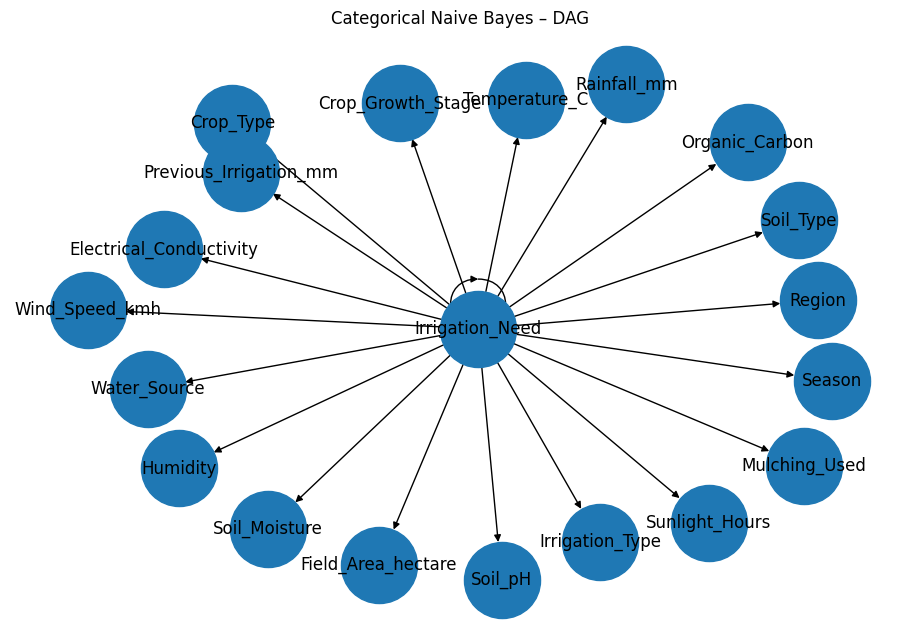

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
target = "Irrigation_Need"

G.add_node(target)
for f in df_nb.columns:
    G.add_edge(target, f)

plt.figure(figsize=(9, 6))
nx.draw(G, with_labels=True, node_size=3000)
plt.title("Categorical Naive Bayes – DAG")
plt.show()